In [ ]:
!pip install bokeh
!pip install seaborn
!pip install scipy

In [4]:
import pyodbc as pyodbc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

DB_SERVER = '192.168.9.136'
DB_PORT = '1433'
DB_NAME = 'TOAT'
DB_USER = 'rpt_anonimo'
DB_PASSWORD = '12'

connStr = ('DRIVER={ODBC Driver 17 for SQL Server};Server=%s,%s;port=%s;Database=%s;uid=%s;pwd=%s') \
         % (DB_SERVER, DB_PORT, DB_PORT, DB_NAME, DB_USER, DB_PASSWORD)
print(connStr)
cnxn = pyodbc.connect(connStr)
cursor = cnxn.cursor()
print(cnxn, cursor)
print(cursor.execute("SELECT @@SPID").fetchone())

DRIVER={ODBC Driver 17 for SQL Server};Server=192.168.9.136,1433;port=1433;Database=TOAT;uid=rpt_anonimo;pwd=12
<pyodbc.Connection object at 0x000002B710BD75E0> <pyodbc.Cursor object at 0x000002B73203B530>
(55, )


In [5]:
import textwrap
sql = textwrap.dedent("""
SELECT TOP 1000
   --CONVERT(VARCHAR(10), [fe_reg], 120) as fecha
   --YEAR([fe_reg]) as anio, MONTH([fe_reg]) as mes, DATEPART (wk, [fe_reg]) as semana
   STR(YEAR([fe_reg])) + ' ' + STR(MONTH([fe_reg])) + ' ' + STR(DATEPART (wk, [fe_reg])) AS SEMANA
  --,[tip]
  --,[id_mrc]
  ,count(1) as cantidad
FROM [TOAT].[api].[process] with(nolock)
WHERE [fe_reg] >= '2021-11-01' and tip in ('ACO')
GROUP BY
    --CONVERT(VARCHAR(10), [fe_reg], 120)
    STR(YEAR([fe_reg])) + ' ' + STR(MONTH([fe_reg])) + ' ' + STR(DATEPART (wk, [fe_reg]))
    --,[tip]
    --,[id_mrc]
HAVING COUNT(1) > 1
order by 1
""")

In [8]:
num_list = 40
df = pd.read_sql(sql, cnxn)
df.head(num_list)

,SEMANA,cantidad
0,2021 11 45,5376
1,2021 11 46,5905
2,2021 11 47,6924
3,2021 11 48,8314
4,2021 11 49,3221
5,2021 12 49,8797
6,2021 12 50,10646
7,2021 12 51,11837
8,2021 12 52,9180
9,2021 12 53,6470


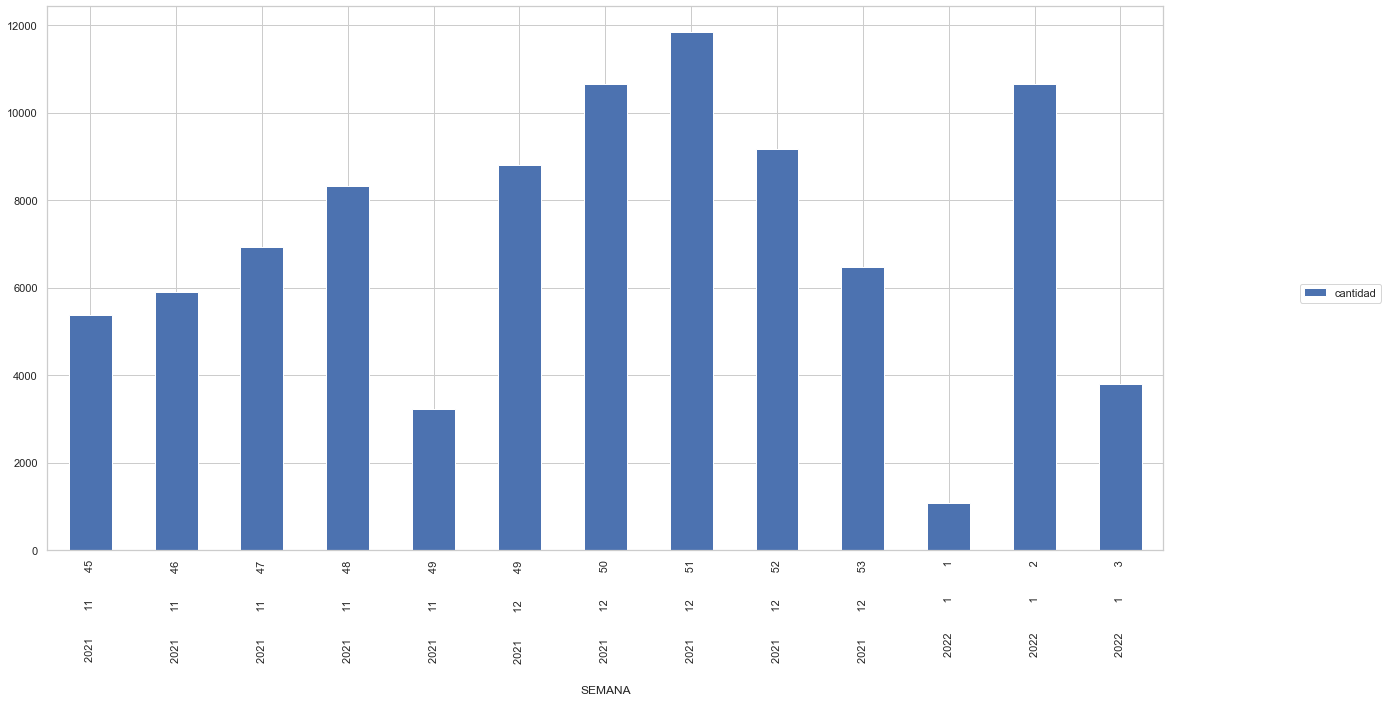

In [9]:
sns.set(style="whitegrid")
ax = df.head(num_list).plot.bar(x='SEMANA', y='cantidad', rot=0, figsize=(20,10)).legend(bbox_to_anchor=(1.2, 0.5))
plt.xticks(df.head(num_list).index, df.head(num_list)['SEMANA'], rotation='vertical')
plt.show()

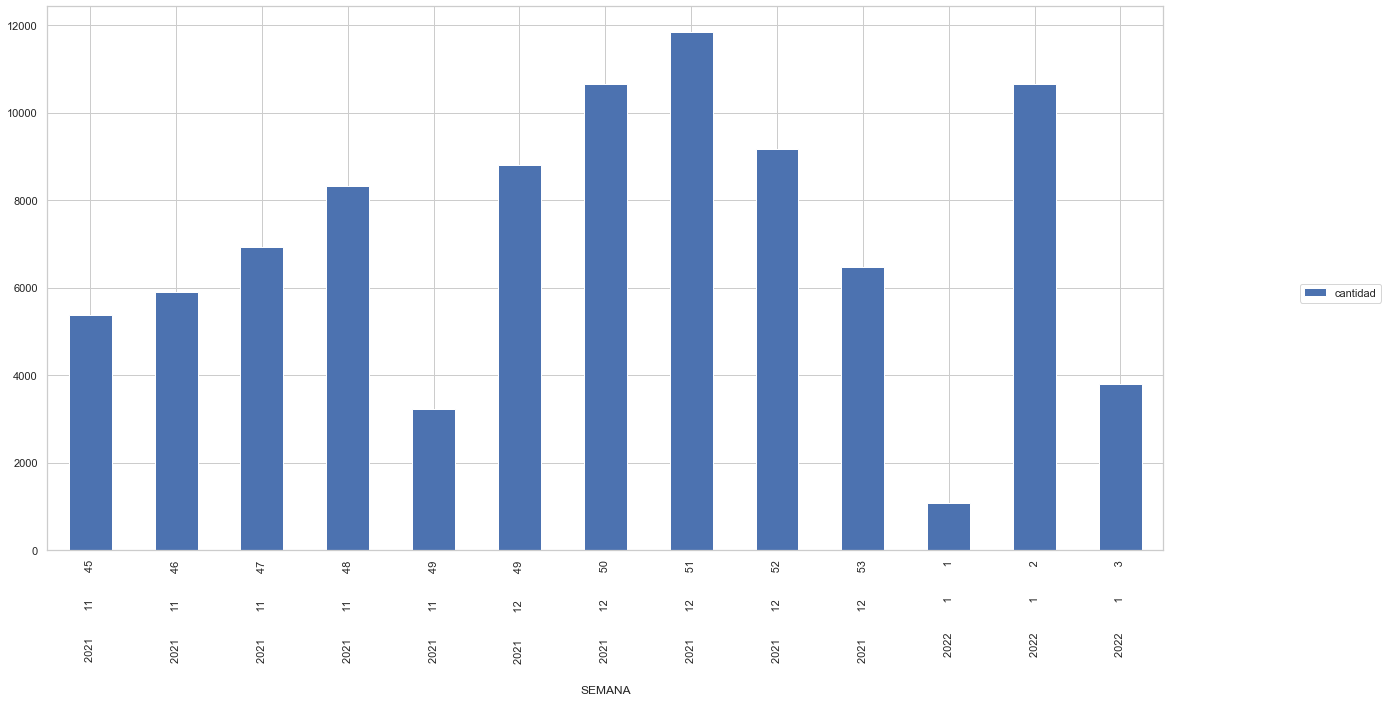

In [7]:
sns.set(style="whitegrid")
ax = df.plot.bar(x='SEMANA', y='cantidad', rot=0, figsize=(20,10)).legend(bbox_to_anchor=(1.2, 0.5))
plt.xticks(df.index, df['SEMANA'], rotation='vertical')
plt.show()

In [8]:
import textwrap
sql = textwrap.dedent("""
SELECT TOP 200000
        [id_process]
      ,[es_pro]
      ,[me_pro]
      ,[fe_reg]
      ,[tip]
      ,[id_mrc]
  FROM [TOAT].[api].[process] WITH(NOLOCK)
  WHERE fe_reg >= '2021-11-01'
  ORDER BY 1 DESC
""")

In [9]:
df = pd.read_sql(sql, cnxn)
df.head()

,id_process,es_pro,me_pro,fe_reg,tip,id_mrc
0,602056,TER,PUT,2022-01-11 22:45:42.680,ACO,1
1,602055,TER,PUT,2022-01-11 22:44:53.503,ACO,2
2,602054,TER,PUT,2022-01-11 22:43:16.403,ACO,2
3,602053,TER,PUT,2022-01-11 22:42:42.003,COT,2
4,602052,TER,PUT,2022-01-11 22:42:42.000,COT,2


In [14]:
df.describe()

,id_process,id_mrc
count,114442.000000,114442.000000
mean,544835.500000,1.417635
std,33036.704091,0.493172
min,487615.000000,1.000000
25%,516225.250000,1.000000
50%,544835.500000,1.000000
75%,573445.750000,2.000000
max,602056.000000,2.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114442 entries, 0 to 114441
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_process  114442 non-null  int64         
 1   es_pro      114442 non-null  object        
 2   me_pro      114442 non-null  object        
 3   fe_reg      114442 non-null  datetime64[ns]
 4   tip         114442 non-null  object        
 5   id_mrc      114442 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.2+ MB


In [25]:
df['fe_reg'].value_counts()

2021-12-15 22:26:46.720    4
2021-12-03 22:22:35.047    3
2022-01-07 22:29:43.833    3
2021-12-04 19:21:43.820    3
2021-11-03 17:52:08.567    3
                          ..
2021-12-18 13:24:52.903    1
2021-12-18 13:24:53.090    1
2021-12-18 13:24:53.847    1
2021-12-18 13:24:54.317    1
2021-11-01 01:10:52.537    1
Name: fe_reg, Length: 113809, dtype: int64

In [39]:
# "%Y-%m-%d %H:%M:%S.%f"
df['fecha'] = pd.to_datetime(df["fe_reg"].dt.strftime("%Y-%m-%d"))
df.tail()

,id_process,es_pro,me_pro,fe_reg,tip,id_mrc,fecha
114437,487619,PEN,PUT,2021-11-01 01:10:54.920,ACO,1,2021-11-01
114438,487618,PEN,PUT,2021-11-01 01:10:54.847,ACO,1,2021-11-01
114439,487617,PEN,PUT,2021-11-01 01:10:53.500,ACO,2,2021-11-01
114440,487616,PEN,PUT,2021-11-01 01:10:52.590,ACO,1,2021-11-01
114441,487615,PEN,PUT,2021-11-01 01:10:52.537,ACO,1,2021-11-01


In [101]:
# df['fecha'].value_counts(sort=True, ascending=True)
df['fecha'].value_counts(sort=False).tail()

2021-11-05    1419
2021-11-04    1130
2021-11-03    1138
2021-11-02    1209
2021-11-01     877
Name: fecha, dtype: int64

In [90]:
dfG = df.groupby(['fecha'])['id_process'].count()
dfG.head()

fecha
2021-11-01     877
2021-11-02    1209
2021-11-03    1138
2021-11-04    1130
2021-11-05    1419
Name: id_process, dtype: int64

In [91]:
dfG.to_frame().tail()

,id_process
fecha,
2022-01-07,2500
2022-01-08,1530
2022-01-09,1235
2022-01-10,1588
2022-01-11,1990


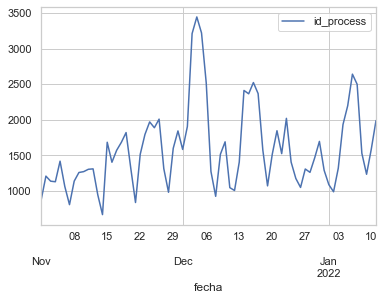

In [93]:
dfG.to_frame().plot()
plt.show()

In [122]:
df['fecha'].value_counts(sort=False).head()

2022-01-11    1990
2022-01-10    1588
2022-01-09    1235
2022-01-08    1530
2022-01-07    2500
Name: fecha, dtype: int64

In [152]:
df['fecha_count'] = df['fecha'].map(df['fecha'].value_counts())
# df['fecha_count']
df['fecha'].map(df['fecha'].value_counts())

0         1990
1         1990
2         1990
3         1990
4         1990
          ... 
114437     877
114438     877
114439     877
114440     877
114441     877
Name: fecha, Length: 114442, dtype: int64

In [137]:
df[['es_pro', 'me_pro', 'tip', 'id_mrc']].value_counts()

es_pro  me_pro  tip  id_mrc
PEN     PUT     ACO  1         46647
                     2         36862
TER     PUT     COT  1          9600
                     2          5425
                ACO  1          3957
        POST    COT  1          3523
        PUT     ACO  2          2255
        POST    COT  2          2011
                ACO  1          1510
                     2           622
        PUT     OC   1           346
        POST    OC   1           325
PEN     POST    COT  1           315
                ACO  1           298
TER     PUT     OC   2           242
        POST    OC   2           236
PEN     POST    COT  2            89
        PUT     OC   1            82
        POST    ACO  2            48
                OC   1            38
        PUT     COT  1             6
                     2             4
        POST    OC   2             1
dtype: int64

In [145]:
df['fecha'].value_counts(bins=10)

(2021-11-29 09:36:00, 2021-12-06 12:00:00]              17731
(2022-01-03 21:36:00, 2022-01-11]                       15617
(2021-12-13 14:24:00, 2021-12-20 16:48:00]              13835
(2021-11-22 07:12:00, 2021-11-29 09:36:00]              11560
(2021-12-20 16:48:00, 2021-12-27 19:12:00]              10334
(2021-11-15 04:48:00, 2021-11-22 07:12:00]              10153
(2021-12-27 19:12:00, 2022-01-03 21:36:00]               9114
(2021-12-06 12:00:00, 2021-12-13 14:24:00]               8866
(2021-10-31 22:17:45.599999999, 2021-11-08 02:24:00]     8785
(2021-11-08 02:24:00, 2021-11-15 04:48:00]               8447
Name: fecha, dtype: int64

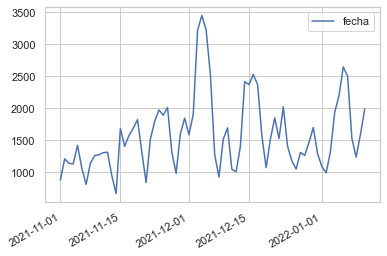

In [161]:
df['fecha'].value_counts().to_frame().plot()
plt.show()